<a href="https://colab.research.google.com/github/glaizalipato/student_success/blob/main/eagle_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [4]:
url ='https://raw.githubusercontent.com/plthrs/FTW-CapstoneProject-TeamEagle/main/dataset_1_combined.csv?token=GHSAT0AAAAAAB6W6AY4PEXBCSKKI7RM6VTQY7TGAHQ'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Scholar_ID,Batch,Year_Graduated,Year_Disqualified,School,Course,Status,High_School,Average_Grade_in_HS,...,Are_Both_Parents_Employed,Is_Only_One_Parent_Employed,Income_Class,Is_Poor,percent_of_cutoff,Class_Poor,Class_Lower,Class_Lower_Middle,Class_Middle_Middle,Class_Upper_Middle
0,0,2007001.0,2007.0,2011.0,NaN,UPD Educ,Secondary/ Mathematics,Graduated,NaN,NaN,...,0,1,Lower,0,0.522242,0,1,0,0,0
1,1,2007002.0,2007.0,2011.0,NaN,UPD,Math,Graduated,Holy Redeemer School of Kalookan,NaN,...,0,1,Poor,1,0.120000,1,0,0,0,0
2,2,2007003.0,2007.0,2011.0,NaN,UPD,Math,Graduated,Aurora National Science High School,NaN,...,1,0,Lower,0,0.430000,0,1,0,0,0
3,3,2009004.0,2009.0,NaN,2011.0,UPD Educ,Secondary/ Art Education,Disqualified,UP Intergrated School,86.50,...,0,1,Lower_Middle,0,1.067593,0,0,1,0,0
4,4,2009005.0,2009.0,2014.0,NaN,UPD Educ,Secondary/ Biology,Graduated,Lourdes School of Mandaluyong,88.77,...,1,0,Middle_Middle,0,1.533333,0,0,0,1,0


In [5]:
df.columns

Index(['Unnamed: 0', 'Scholar_ID', 'Batch', 'Year_Graduated',
       'Year_Disqualified', 'School', 'Course', 'Status', 'High_School',
       'Average_Grade_in_HS', 'Annual_Family_Income', 'Demographic_Location',
       'Father_Occupation', 'Father_Annual_Salary', 'Mother_Occupation',
       'Mother_Annual_Salary', 'No_of_Siblings', 'Scholarship_Status',
       'Is_UPD', 'Is_Education',
       'HS_Avg_Grade_imputed_based_on_demographic_loc',
       'HS_Avg_Grade_imputed_based_on_school_loc', 'HS_Sector', 'HS_Private',
       'HS_Public', 'HS_SUCs/LUCs', 'Urbanity_Level',
       'College_Within_Municipality/City', 'Is_F_employed', 'Is_M_employed',
       'Are_Both_Parents_Employed', 'Is_Only_One_Parent_Employed',
       'Income_Class', 'Is_Poor', 'percent_of_cutoff', 'Class_Poor',
       'Class_Lower', 'Class_Lower_Middle', 'Class_Middle_Middle',
       'Class_Upper_Middle'],
      dtype='object')

In [9]:
df['College_Within_Municipality/City'].unique()

array([0, 1])

## Adjusting Columns

In [21]:
df.columns

Index(['Unnamed: 0', 'Scholar_ID', 'Batch', 'Year_Graduated',
       'Year_Disqualified', 'School', 'Course', 'status_og', 'High_School',
       'hs_grade', 'income', 'Demographic_Location', 'Father_Occupation',
       'Father_Annual_Salary', 'Mother_Occupation', 'Mother_Annual_Salary',
       'siblings', 'status', 'Is_UPD', 'Is_Education',
       'HS_Avg_Grade_imputed_based_on_demographic_loc',
       'HS_Avg_Grade_imputed_based_on_school_loc', 'HS_Sector', 'HS_Private',
       'HS_Public', 'HS_SUCs/LUCs', 'urbanity',
       'College_Within_Municipality/City', 'Is_F_employed', 'Is_M_employed',
       'Are_Both_Parents_Employed', 'Is_Only_One_Parent_Employed',
       'Income_Class', 'Is_Poor', 'percent_of_cutoff', 'Class_Poor',
       'Class_Lower', 'Class_Lower_Middle', 'Class_Middle_Middle',
       'Class_Upper_Middle', 'has_siblings'],
      dtype='object')

In [22]:
df.rename(columns = {'Average_Grade_in_HS':'hs_grade', 
                     'Annual_Family_Income':'income',
                      'Status':'status_og',
                     'No_of_Siblings' : 'siblings', 
                    'Scholarship_Status' : 'status', 
                     'Urbanity_Level': 'urbanity',
                      'HS_Avg_Grade_imputed_based_on_demographic_loc':'grade_demo_loc',
                     'HS_Avg_Grade_imputed_based_on_school_loc': 'grade_school_loc',
                     }, inplace = True)
df.head()

,Unnamed: 0,Scholar_ID,Batch,Year_Graduated,Year_Disqualified,School,Course,status_og,High_School,hs_grade,...,Is_Only_One_Parent_Employed,Income_Class,Is_Poor,percent_of_cutoff,Class_Poor,Class_Lower,Class_Lower_Middle,Class_Middle_Middle,Class_Upper_Middle,has_siblings
0,0,2007001.0,2007.0,2011.0,NaN,UPD Educ,Secondary/ Mathematics,Graduated,NaN,NaN,...,1,Lower,0,0.522242,0,1,0,0,0,1
1,1,2007002.0,2007.0,2011.0,NaN,UPD,Math,Graduated,Holy Redeemer School of Kalookan,NaN,...,1,Poor,1,0.120000,1,0,0,0,0,1
2,2,2007003.0,2007.0,2011.0,NaN,UPD,Math,Graduated,Aurora National Science High School,NaN,...,0,Lower,0,0.430000,0,1,0,0,0,1
3,3,2009004.0,2009.0,NaN,2011.0,UPD Educ,Secondary/ Art Education,Disqualified,UP Intergrated School,86.50,...,1,Lower_Middle,0,1.067593,0,0,1,0,0,1
4,4,2009005.0,2009.0,2014.0,NaN,UPD Educ,Secondary/ Biology,Graduated,Lourdes School of Mandaluyong,88.77,...,0,Middle_Middle,0,1.533333,0,0,0,1,0,1


Adding is_siblings

In [16]:
df['siblings'].unique()

array([2., 1., 3., 0., 4., 5., 6., 7., 8.])

In [15]:
df['has_siblings'] = np.where((df['siblings']>0),1,0)

In [19]:
df.Demographic_Location.unique()

array(['Isabela', 'Caloocan City', 'Quezon City', 'Pasig City',
       'San Pablo City', 'Las Piñas City', 'Makati City', 'Rizal',
       'Surigao del Sur', 'Manila', 'Antipolo City', 'Laguna',
       'Bacoor, Cavite', 'Sta. Ana, Manila', 'Marikina City',
       'Cainta, Rizal', 'Malolos, Bulacan', 'Muntinlupa City',
       'Pandacan, Manila', 'Calbayog City, Samar', 'Silang, Cavite',
       'Montalban, Rizal', 'Dagupan City', 'Mandaluyong City',
       'Silang, Caloocan', 'Solana, Cagayan', 'Baler, Aurora',
       'Mexico, Pampanga', 'Milagros, Masbate', 'Sto. Tomas, Batangas',
       'Laoag City', 'Del monte, Bulacan', 'Calamba, Laguna',
       'Rodriguez, Rizal', 'Dipaculao, Aurora', 'San Luis, Aurora',
       'Maria Aurora, Aurora', 'Tagbilaran City, Bohol',
       'Inabanga, Bohol', 'Alburquerque, Bohol', 'La Trinidad, Benguet',
       'Kapangan, Benguet', 'Pangantucan, Bukidnon', 'Maramag, Bukidnon',
       'Lantapan, Bukidnon', 'Mati City, Davao Oriental', 'Taguig City',
       

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Unnamed: 0                                     230 non-null    int64  
 1   Scholar_ID                                     230 non-null    float64
 2   Batch                                          230 non-null    float64
 3   Year_Graduated                                 92 non-null     float64
 4   Year_Disqualified                              53 non-null     float64
 5   School                                         230 non-null    object 
 6   Course                                         230 non-null    object 
 7   status_og                                      230 non-null    object 
 8   High_School                                    229 non-null    object 
 9   hs_grade                                       200 non

## Selecting Features for All

In [227]:
df.columns

Index(['Unnamed: 0', 'Scholar_ID', 'Batch', 'Year_Graduated',
       'Year_Disqualified', 'School', 'Course', 'status_og', 'High_School',
       'hs_grade', 'income', 'Demographic_Location', 'Father_Occupation',
       'Father_Annual_Salary', 'Mother_Occupation', 'Mother_Annual_Salary',
       'siblings', 'status', 'Is_UPD', 'Is_Education', 'grade_demo_loc',
       'grade_school_loc', 'HS_Sector', 'HS_Private', 'HS_Public',
       'HS_SUCs/LUCs', 'urbanity', 'College_Within_Municipality/City',
       'Is_F_employed', 'Is_M_employed', 'Are_Both_Parents_Employed',
       'Is_Only_One_Parent_Employed', 'Income_Class', 'Is_Poor',
       'percent_of_cutoff', 'Class_Poor', 'Class_Lower', 'Class_Lower_Middle',
       'Class_Middle_Middle', 'Class_Upper_Middle', 'has_siblings',
       'is_urban_high'],
      dtype='object')

In [228]:
df['urbanity'].unique()

array(['Low', 'High'], dtype=object)

In [229]:
df['is_urban_high'] = np.where(df.urbanity == 'High', 1, 0)

In [230]:
feats_1 = ['grade_demo_loc', 'percent_of_cutoff', 'Are_Both_Parents_Employed', 'HS_Private', 'HS_Public',
       'HS_SUCs/LUCs', 'Is_UPD', 'status']
data_0 = df.loc[df['status'].isin(['Graduated', 'Disqualified'])] #Excluding Ongoing

In [231]:
data_1 = data_0[feats_1] 
data_1.head()

,grade_demo_loc,percent_of_cutoff,Are_Both_Parents_Employed,HS_Private,HS_Public,HS_SUCs/LUCs,Is_UPD,status
0,94.920000,0.522242,0,0,1,0,1,Graduated
1,92.980667,0.120000,0,1,0,0,1,Graduated
2,92.980667,0.430000,1,0,1,0,1,Graduated
3,86.500000,1.067593,0,0,0,1,1,Disqualified
4,88.770000,1.533333,1,1,0,0,1,Graduated


In [232]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 195
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grade_demo_loc             145 non-null    float64
 1   percent_of_cutoff          145 non-null    float64
 2   Are_Both_Parents_Employed  145 non-null    int64  
 3   HS_Private                 145 non-null    int64  
 4   HS_Public                  145 non-null    int64  
 5   HS_SUCs/LUCs               145 non-null    int64  
 6   Is_UPD                     145 non-null    int64  
 7   status                     145 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 10.2+ KB


## Train Test Split

In [417]:
X = data_1.drop('status',axis=1)
y = data_1['status']

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [436]:
dtree = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 5, max_depth = 10)
#criterion = gini, max leaf nodes =5 max_depth = 8 0.25 0.70 0.66
#criterion = gini, max leaf nodes =2 max_depth = 10 0.27 0.67 0.53
#criterion = gini, max leaf nodes =10 max_depth = 10 0.29 0.70 0.50
#criterion = gini, max leaf nodes =5 max_depth = 10 0.25, 0.60 0.66

In [437]:
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [438]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

Disqualified       0.25      0.08      0.12        13
   Graduated       0.70      0.90      0.79        31

    accuracy                           0.66        44
   macro avg       0.47      0.49      0.45        44
weighted avg       0.57      0.66      0.59        44



In [367]:
print(confusion_matrix(y_test,predictions))

[[ 6  4]
 [11  9]]


## Visualization Attempts - Decision Tree

In [209]:
!pip install pydot
!pip install six
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [210]:
from IPython.display import Image  
from six import StringIO
# from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [211]:
features = list(data_1.drop('status', axis = 1))
features

['grade_demo_loc',
 'percent_of_cutoff',
 'Are_Both_Parents_Employed',
 'HS_Private',
 'HS_Public',
 'HS_SUCs/LUCs',
 'Is_UPD']

In [224]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

graph

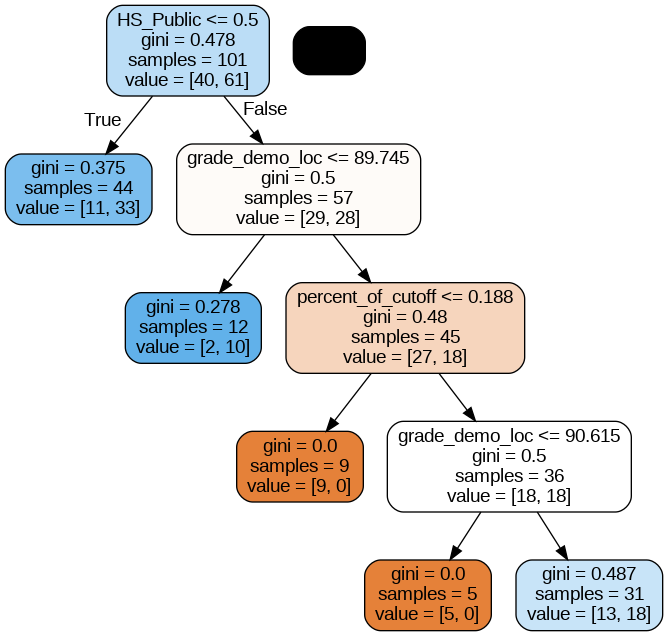

In [225]:
Image(graph[0].create_png()) 

## Random Forest

In [410]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, min_samples_split = 5, max_features = 2) 

#5 max features, 50 estimators min split = 20  0.35, 0.70, 0.47
#2 max features, 50 estimators min split = 10  0.35, 0.69, 0.5
#2 max features, 100 estimators min split = 10  0.39 0.75, 0.53
#2 max features, 100 estimators min split = 5  0.36 0.69, 0.53
rfc

RandomForestClassifier(max_features=2, min_samples_split=5)

In [411]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [412]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

Disqualified       0.36      0.50      0.42        10
   Graduated       0.69      0.55      0.61        20

    accuracy                           0.53        30
   macro avg       0.52      0.53      0.51        30
weighted avg       0.58      0.53      0.55        30



In [405]:
print(confusion_matrix(y_test,rfc_pred))

[[ 6  4]
 [11  9]]


## Selecting Features for UPD

In [519]:
data_upd = data_1.loc[data_1['Is_UPD'] == 1] #Excluding Provincial
data_upd.head()

,grade_demo_loc,percent_of_cutoff,Are_Both_Parents_Employed,HS_Private,HS_Public,HS_SUCs/LUCs,Is_UPD,status
0,94.920000,0.522242,0,0,1,0,1,Graduated
1,92.980667,0.120000,0,1,0,0,1,Graduated
2,92.980667,0.430000,1,0,1,0,1,Graduated
3,86.500000,1.067593,0,0,0,1,1,Disqualified
4,88.770000,1.533333,1,1,0,0,1,Graduated


In [520]:
data_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 195
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   grade_demo_loc             99 non-null     float64
 1   percent_of_cutoff          99 non-null     float64
 2   Are_Both_Parents_Employed  99 non-null     int64  
 3   HS_Private                 99 non-null     int64  
 4   HS_Public                  99 non-null     int64  
 5   HS_SUCs/LUCs               99 non-null     int64  
 6   Is_UPD                     99 non-null     int64  
 7   status                     99 non-null     object 
dtypes: float64(2), int64(5), object(1)
memory usage: 7.0+ KB


## Train Test Split for UPD

In [521]:
X2 = data_upd.drop('status',axis=1)
y2 = data_upd['status']

In [522]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state = 42)

In [523]:
dtree2 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, max_depth = 8)
#gini maxleafnodes = 5 max depth = 5 0.35 0.69 0.5
#gini maxleafnodes = 5 max depth = 10 0.35 0.69 0.5
#gini maxleafnodes = 2 max depth = 5 0.37 0.73 0.5
#gini maxleafnodes = 10 max depth = 5 0.38 0.71 0.53
#just gini 0.28, 0.58 0.4
#just entropy 0.37, 0.73, 0.5
#entropy maxleafnored = 10 max depth = 8 0.4 0.73 0.58

In [524]:
dtree2.fit(X2_train,y2_train)
predictions2 = dtree2.predict(X2_test)

In [525]:
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

Disqualified       0.40      0.60      0.48        10
   Graduated       0.73      0.55      0.63        20

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.55        30
weighted avg       0.62      0.57      0.58        30



In [458]:
print(confusion_matrix(y_test,predictions))

[[ 6  7]
 [15 16]]


## Logistic Regression ALL

In [484]:
from sklearn.linear_model import LogisticRegression

In [531]:
logmodel = LogisticRegression(max_iter = 20)
#no tuning 0.43, 0.77 0.66
#max iter = 1000 0.46, 0.77 0.68
#max iter = 500 sag 0.55, 0.79 0.73
#max iter = 300 saga 0, 0.7 0.7

#lbfgs
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
logmodel.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6818181818181818

In [506]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

Disqualified       0.00      0.00      0.00        13
   Graduated       0.70      1.00      0.83        31

    accuracy                           0.70        44
   macro avg       0.35      0.50      0.41        44
weighted avg       0.50      0.70      0.58        44



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Features 2

In [532]:
df.columns

Index(['Unnamed: 0', 'Scholar_ID', 'Batch', 'Year_Graduated',
       'Year_Disqualified', 'School', 'Course', 'status_og', 'High_School',
       'hs_grade', 'income', 'Demographic_Location', 'Father_Occupation',
       'Father_Annual_Salary', 'Mother_Occupation', 'Mother_Annual_Salary',
       'siblings', 'status', 'Is_UPD', 'Is_Education', 'grade_demo_loc',
       'grade_school_loc', 'HS_Sector', 'HS_Private', 'HS_Public',
       'HS_SUCs/LUCs', 'urbanity', 'College_Within_Municipality/City',
       'Is_F_employed', 'Is_M_employed', 'Are_Both_Parents_Employed',
       'Is_Only_One_Parent_Employed', 'Income_Class', 'Is_Poor',
       'percent_of_cutoff', 'Class_Poor', 'Class_Lower', 'Class_Lower_Middle',
       'Class_Middle_Middle', 'Class_Upper_Middle', 'has_siblings',
       'is_urban_high'],
      dtype='object')

In [536]:
feats_2 = ['hs_grade', 'income', 'has_siblings', 'grade_demo_loc', 'College_Within_Municipality/City', 'Is_F_employed', 'Is_M_employed', 'Is_Poor',  'is_urban_high', 'status']
data_3 = data_0[feats_2] 

In [547]:
X3 = data_3.drop('status',axis=1)
y3 = data_3['status']

In [551]:
y3

0         Graduated
1         Graduated
2         Graduated
3      Disqualified
4         Graduated
           ...     
159    Disqualified
168    Disqualified
172    Disqualified
191    Disqualified
195    Disqualified
Name: status, Length: 145, dtype: object

In [548]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state = 42)

In [552]:
dtree3 = DecisionTreeClassifier()

In [553]:
dtree3.fit(X3_train, y3_train)

ValueError: ignored

In [ ]:
print(classification_report(y3_test,predictions3))